In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import cv2

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
# import tensorflow_addons as tfa

AUTOTUNE = tf.data.experimental.AUTOTUNE

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image as Image

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

from kaggle_datasets import KaggleDatasets
import warnings
warnings.simplefilter('ignore')

Number of replicas: 1


# Exploratory Data Analysis

This Monet dataset has already been cleaned and we can safely assume the Monet images under the Monet folders are actually Monet images and not falsely identified.

We will load the datasets and perform basic EDA by looking through the images and getting a sense of what they look like.

In [3]:
path = KaggleDatasets().get_gcs_path()
path

'gs://kds-69ba3c193b762dde2ee8df59f0d7a4a34e92d84f883f9eead51c4bec'

In [4]:
# Look at tfrec type files
monet_filenames = tf.io.gfile.glob(str(path + '/monet_tfrec/*.tfrec'))
print('Monet TFRecord Files:', len(monet_filenames))

photo_filenames = tf.io.gfile.glob(str(path + '/photo_tfrec/*.tfrec'))
print('Photo TFRecord Files:', len(monet_filenames))

Monet TFRecord Files: 5
Photo TFRecord Files: 5


(256, 256, 3)


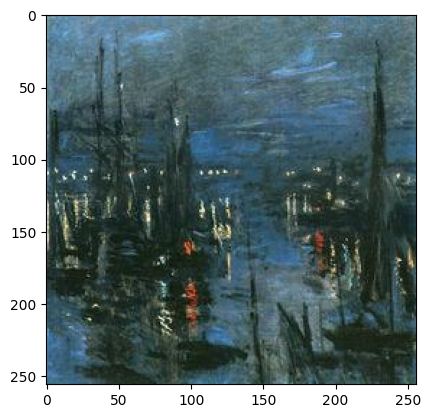

In [5]:
# Look at sample Monet jpeg image
#We have been given .tfrec files and jpeg, for the project we will use .tfrec files

image_monet = Image.imread('/kaggle/input/gan-getting-started/monet_jpg/058f878b7c.jpg')
print(image_monet.shape)
plt.imshow(image_monet)
plt.show()

(256, 256, 3)


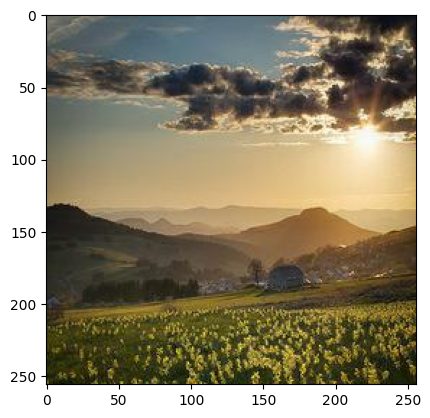

In [6]:
# Look at non-Monet jpeg image

image_non = Image.imread('/kaggle/input/gan-getting-started/photo_jpg/00068bc07f.jpg')
print(image_non.shape)
plt.imshow(image_non)
plt.show()
